In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [36]:
df = pd.read_csv(r"C:\Users\HP\Downloads\advertising.csv")

In [37]:
print("Dataset Head:")
print(df.head())
print("\n")

Dataset Head:
      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9




In [38]:
print("Dataset Info:")
print(df.info())
print("\n")

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None




In [39]:
print("Dataset Description:")
print(df.describe())
print("\n")


Dataset Description:
               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000   45.100000   19.050000
max    296.400000   49.600000  114.000000   27.000000




In [40]:
print("Missing Values:")
print(df.isnull().sum())
print("\n")

Missing Values:
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64




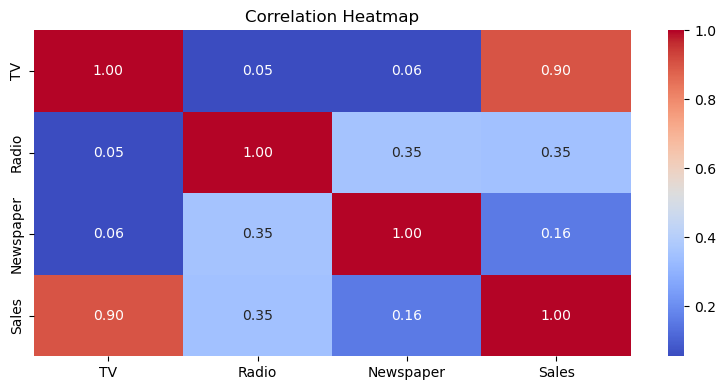

In [41]:
plt.figure(figsize=(8, 4))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

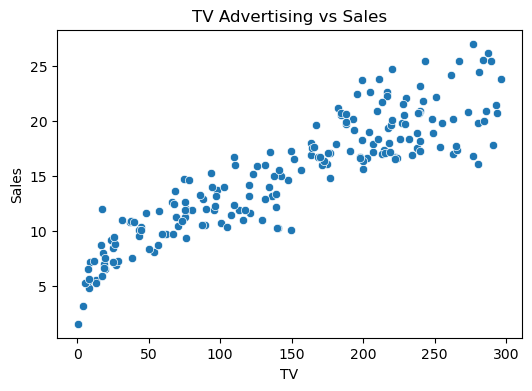

In [42]:
plt.figure(figsize=(6,4))
sns.scatterplot(x="TV", y="Sales", data=df)
plt.title("TV Advertising vs Sales")
plt.show()

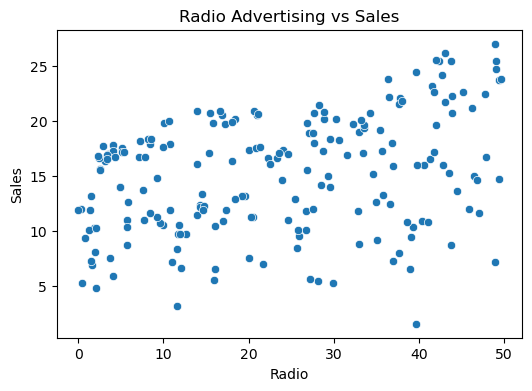

In [30]:
plt.figure(figsize=(6,4))
sns.scatterplot(x="Radio", y="Sales", data=df)
plt.title("Radio Advertising vs Sales")
plt.show()


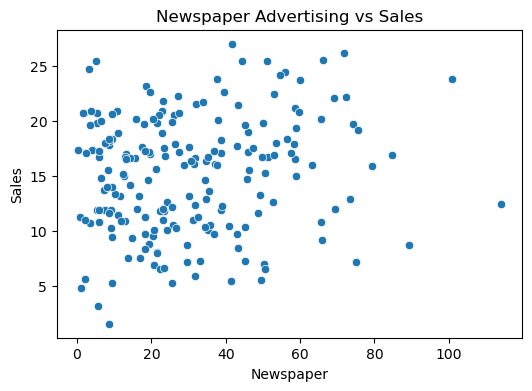

In [43]:
plt.figure(figsize=(6,4))
sns.scatterplot(x="Newspaper", y="Sales", data=df)
plt.title("Newspaper Advertising vs Sales")
plt.show()

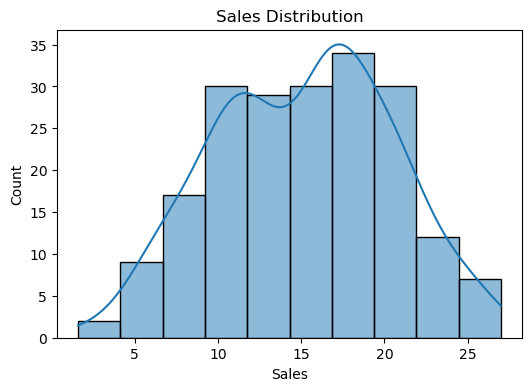

In [44]:
plt.figure(figsize=(6,4))
sns.histplot(df["Sales"], kde=True)
plt.title("Sales Distribution")
plt.show()


In [12]:
X = df[["TV", "Radio", "Newspaper"]]
y = df["Sales"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
model = LinearRegression()
model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [14]:
y_pred = model.predict(X_test)

In [15]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)


In [16]:
print("MAE :", mean_absolute_error(y_test, y_pred))
print("MSE :", mean_squared_error(y_test, y_pred))
print("RMSE :", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score :", r2_score(y_test, y_pred))

MAE : 1.274826210954934
MSE : 2.9077569102710905
RMSE : 1.7052146229349228
R2 Score : 0.9059011844150826


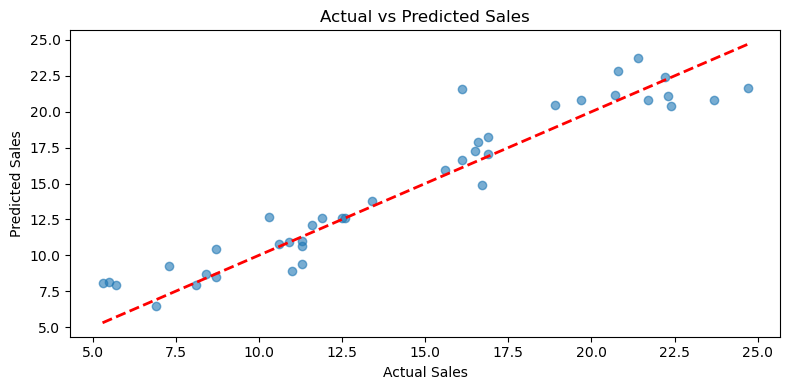

In [45]:
plt.figure(figsize=(8, 4))
plt.scatter(y_test, y_pred_test, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.tight_layout()
plt.show()


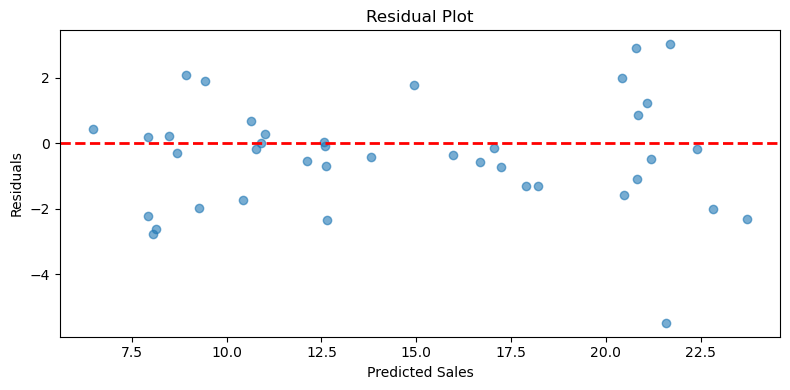

In [46]:
residuals = y_test - y_pred_test
plt.figure(figsize=(8, 4))
plt.scatter(y_pred_test, residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.xlabel('Predicted Sales')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.tight_layout()
plt.show()


In [47]:
print("Example Prediction:")
new_data = pd.DataFrame({
    'TV': [150.0],
    'Radio': [40.0],
    'Newspaper': [60.0]
})

predicted_sales = model.predict(new_data)
print(f"For TV=150, Radio=40, Newspaper=60:")
print(f"Predicted Sales: {predicted_sales[0]:.2f}")
print("\n")

Example Prediction:
For TV=150, Radio=40, Newspaper=60:
Predicted Sales: 17.19




In [20]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})
feature_importance = feature_importance.sort_values(by='Coefficient', ascending=False).reset_index(drop=True)

print("\nFeature Importance:")
print(feature_importance)



Feature Importance:
     Feature  Coefficient
0      Radio     0.100945
1         TV     0.054509
2  Newspaper     0.004337


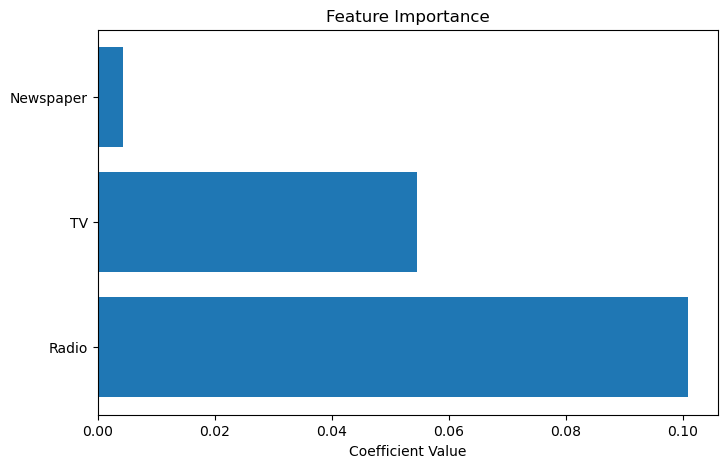

In [48]:
plt.figure(figsize=(8,5))
plt.barh(feature_importance['Feature'], feature_importance['Coefficient'])
plt.xlabel('Coefficient Value')
plt.title('Feature Importance')
plt.show()